# 1 Effect of Normalization, Feature, Extraction and Distance Metrics

## 1.1 Tasks

### 1.1.1 Train/Test Data Split:

In [13]:
#libraries
import numpy as np
import pandas as pd
import random
import seaborn as sns
sns.set(style="ticks", color_codes=True)
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

### 1.1.2 Normalization:

Text(0.5, 1.08, 'Normalized')

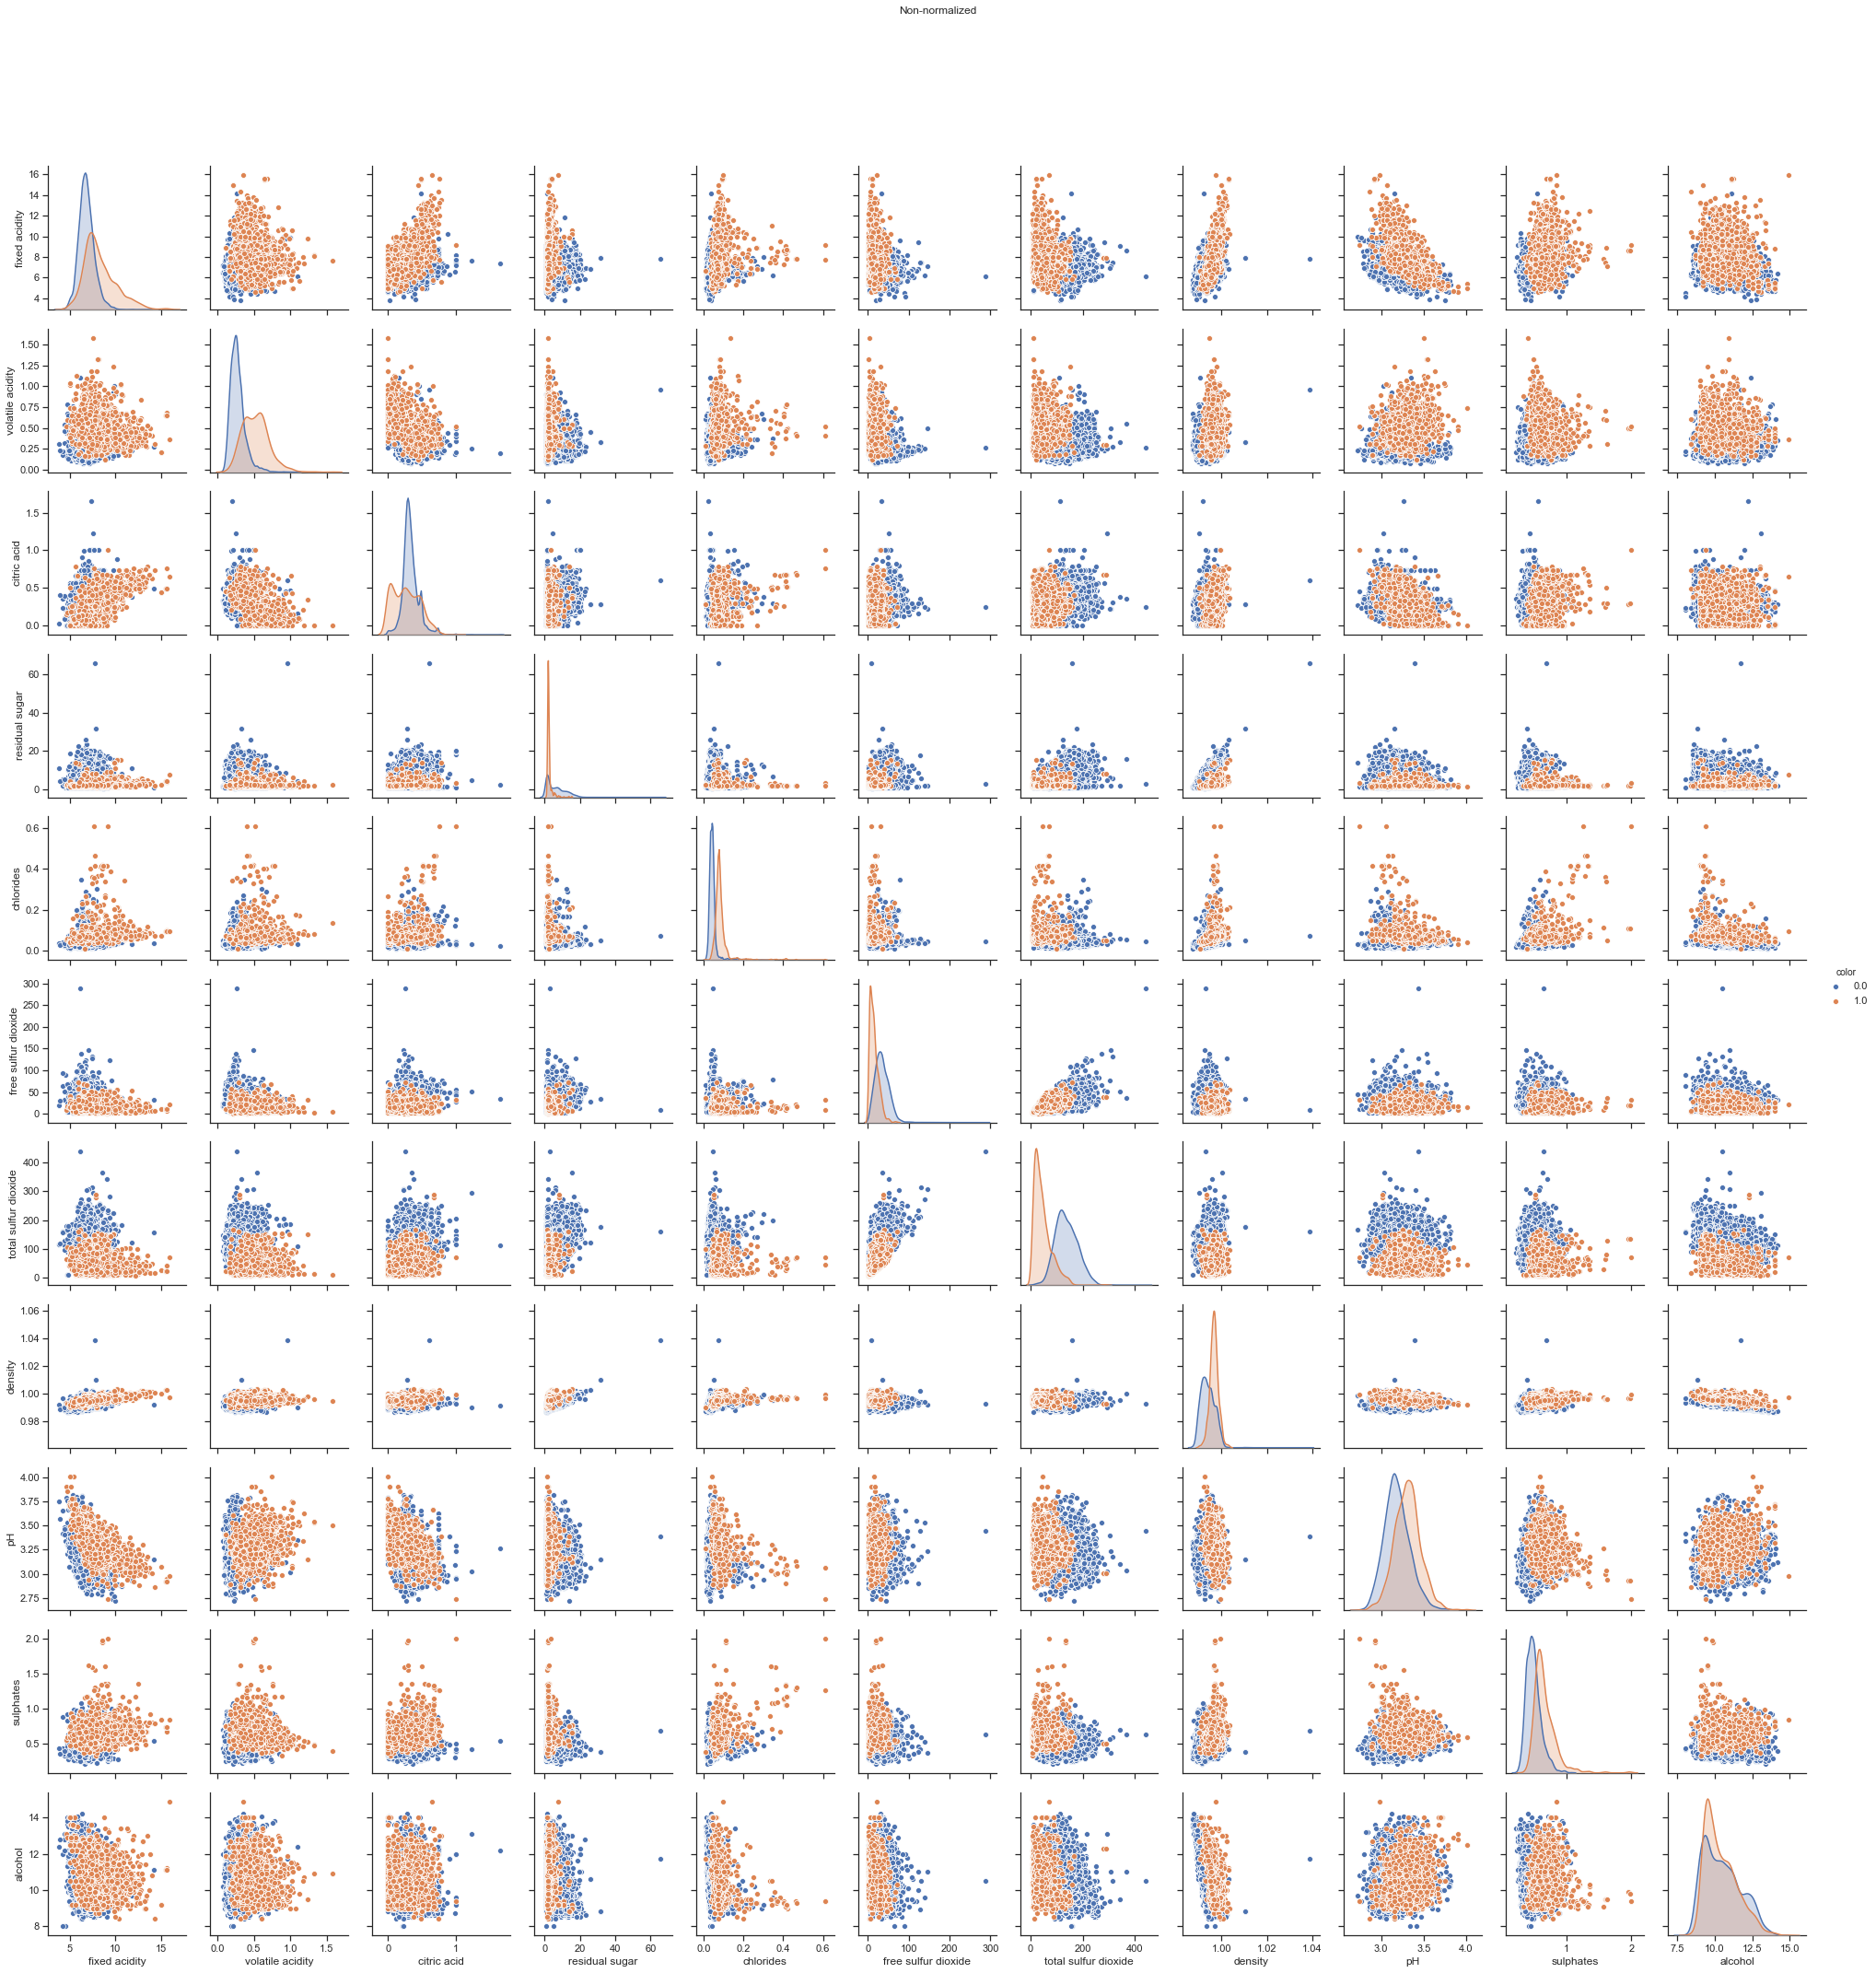

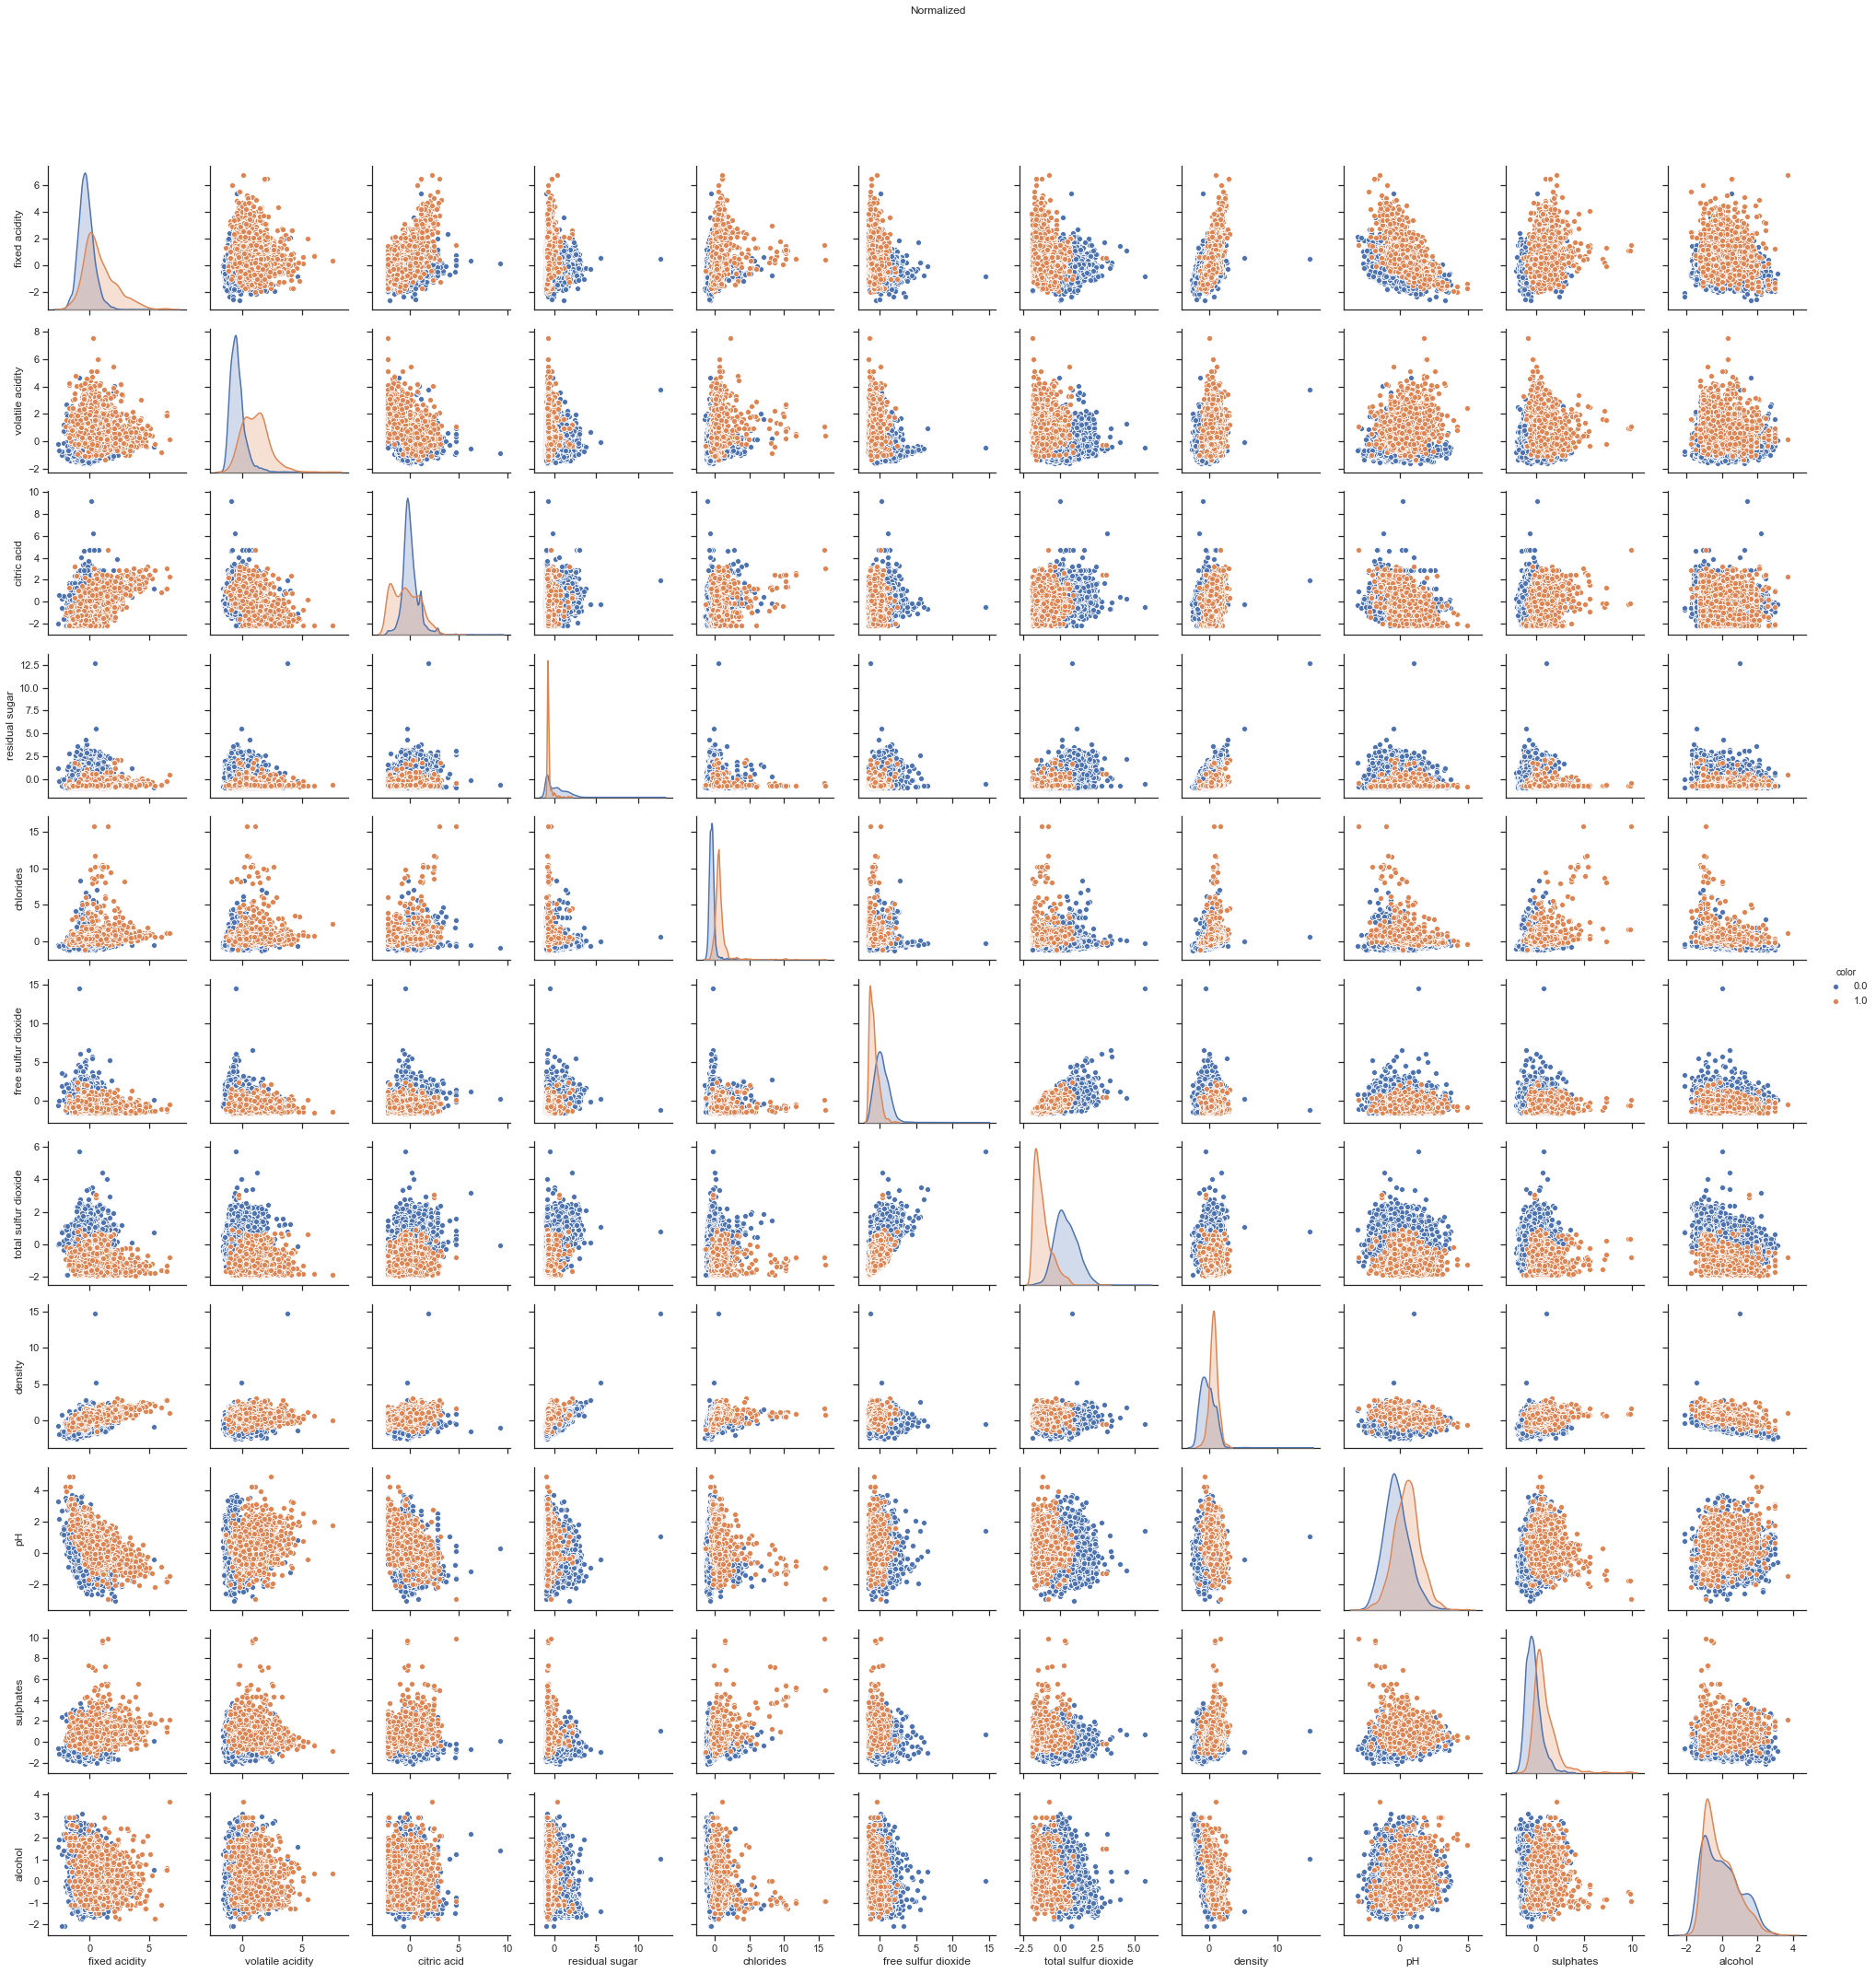

In [10]:
#Columns/Features
D = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
L = 'quality'
C = 'color'
DL = D + [L]
DC = D + [C]
DLC = DL + [C]

#Loading Data set
wine_r = pd.read_csv("winequality-red.csv", sep=';')
#Loading Data set
wine_w = pd.read_csv("winequality-white.csv", sep=';')
wine_w= wine_w.copy()
wine_w[C]= np.zeros(wine_w.shape[0])
wine_r[C]= np.ones(wine_r.shape[0])
wine = pd.concat([wine_w,wine_r])

#z-score normalized
zscore_normalize = lambda x: (x - x.mean()) / x.std()
wine_normalized1 = wine[D].apply(zscore_normalize)

names = wine[D].columns

figure1 = sns.pairplot(wine[DLC], vars=names, hue='color')
figure1.fig.suptitle("Non-normalized", y=1.08)

wine_normalized = pd.concat([wine_normalized1, wine[DLC]['color']], axis = 1)
wine_normalized.head()

figure2 = sns.pairplot(wine_normalized, vars = names ,hue='color')
figure2.fig.suptitle("Normalized", y=1.08)

Z-score normalization preserves range, max and min, and introduce standard deviation/ variance. According to the comparison between none normalization and z-score normalization, the pair plots are not change, like the points distribution and curve. 

According to my plots above, there are three main differences:  
-Difference 1: Based on the observation, the data is centered to the mean and the scaling of axis is changed.  
-Difference 2: The data is unit variance.  
-Difference 3: The outliers and other data have the same order of variance.

### 1.1.3 Classification

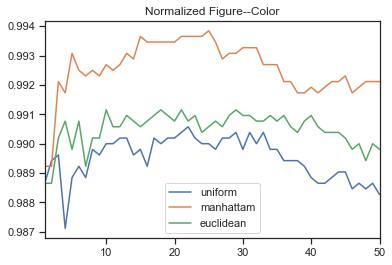

In [11]:
# classify color of wine with all features
X = wine_normalized[D].values
y = np.ravel(wine_normalized[[C]])

# train/test split
ran = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state = ran) 

#normalize-uniform
n_neighborslist = list(range(1,51))
col_names=['uniform']
accarray = np.zeros((len(n_neighborslist),1))
acc=pd.DataFrame(accarray, columns=col_names)
for k in n_neighborslist:
    # use uniform
    neigh = neighbors.KNeighborsClassifier(n_neighbors=k, weights=col_names[0])
    neigh.fit(X_train, y_train)
    y_pred = neigh.predict(X_test)
    accscore = accuracy_score(y_test, y_pred)
    acc.at[k,col_names[0]] = accscore
    
#normalize-manhattam
n_neighborslist = list(range(1,51))
col_names=['distance']
accarray = np.zeros((len(n_neighborslist),1))
acc_man=pd.DataFrame(accarray, columns=['manhattam'])
for k in n_neighborslist:
    # use manhattam distance
    neigh = neighbors.KNeighborsClassifier(n_neighbors=k, weights=col_names[0], p=1)
    neigh.fit(X_train, y_train)
    y_pred = neigh.predict(X_test)
    accscore = accuracy_score(y_test, y_pred)
    acc_man.at[k,'manhattam'] = accscore
    
#Normalize-euclidean
n_neighborslist = list(range(1,51))
col_names=['distance']
accarray = np.zeros((len(n_neighborslist),1))
acc_eu =pd.DataFrame(accarray, columns=['euclidean'])
for k in n_neighborslist:
    # use euclidean distance
    neigh = neighbors.KNeighborsClassifier(n_neighbors=k, weights=col_names[0], p=2)
    neigh.fit(X_train, y_train)
    y_pred = neigh.predict(X_test)
    accscore = accuracy_score(y_test, y_pred)
    acc_eu.at[k,'euclidean'] = accscore

ax = plt.gca()
ax.set_title('Normalized Figure--Color')

acc[1:].plot(ax = ax, kind='line',  y = 'uniform')
acc_man[1:].plot(ax = ax, kind='line',  y = 'manhattam')
acc_eu[1:].plot(ax = ax, kind='line', y = 'euclidean')

plt.show()

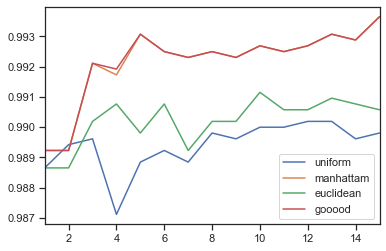

In [12]:
#bonus
n_neighborslist = list(range(1,16))
col_names=['distance']
accarray = np.zeros((len(n_neighborslist),1))

#add multiple plots to same chart, one for each weighting approach
acc_go=pd.DataFrame(accarray, columns=['gooood'])

for k in n_neighborslist:
    # use manhattam distance
    neigh = neighbors.KNeighborsClassifier(n_neighbors=k, weights=col_names[0], p=1.005)
    neigh.fit(X_train, y_train)
    y_pred = neigh.predict(X_test)
    accscore = accuracy_score(y_test, y_pred)
    acc_go.at[k,'gooood'] = accscore
ax.set_title('Bonus')
ax = plt.gca()

acc[1:16].plot(ax = ax, kind='line',  y = 'uniform')
acc_man[1:16].plot(ax = ax, kind='line',  y = 'manhattam')
acc_eu[1:16].plot(ax = ax, kind='line', y = 'euclidean')
acc_go[1:16].plot(ax = ax, kind='line', y = 'gooood')

plt.show()

### 1.1.4 Feature Extraction

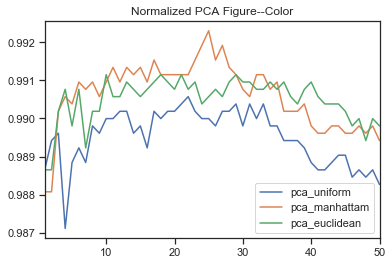

In [14]:
pca = PCA()
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

#uniform
n_neighborslist = list(range(1,51))
col_names=['uniform']
accarray = np.zeros((len(n_neighborslist),1))
acc_pca=pd.DataFrame(accarray, columns=col_names)
for k in n_neighborslist:
    neigh = neighbors.KNeighborsClassifier(n_neighbors=k, weights=col_names[0])
    neigh.fit(X_train_pca, y_train)
    y_pred = neigh.predict(X_test_pca)
    accscore = accuracy_score(y_test, y_pred)
    acc_pca.at[k,'pca_uniform'] = accscore

#manhattam
n_neighborslist = list(range(1,51))
accarray = np.zeros((len(n_neighborslist),1))
acc_pca_man=pd.DataFrame(accarray, columns=['pca_manhattam'])
for k in n_neighborslist:
    neigh = neighbors.KNeighborsClassifier(n_neighbors=k, weights='distance', p=1)
    neigh.fit(X_train_pca, y_train)
    y_pred = neigh.predict(X_test_pca)
    accscore = accuracy_score(y_test, y_pred)
    acc_pca_man.at[k,'pca_manhattam'] = accscore
    
#euclidean
n_neighborslist = list(range(1,51))
accarray = np.zeros((len(n_neighborslist),1))
acc_pca_euc=pd.DataFrame(accarray, columns=['pca_euclidean'])
for k in n_neighborslist:
    neigh = neighbors.KNeighborsClassifier(n_neighbors=k, weights='distance', p=2)
    neigh.fit(X_train_pca, y_train)
    y_pred = neigh.predict(X_test_pca)
    accscore = accuracy_score(y_test, y_pred)
    acc_pca_euc.at[k,'pca_euclidean'] = accscore
    
ax = plt.gca()
ax.set_title('Normalized PCA Figure--Color')
acc_pca[1:].plot(ax = ax, kind='line',  y = 'pca_uniform')
acc_pca_man[1:].plot(ax = ax, kind='line',  y = 'pca_manhattam')
acc_pca_euc[1:].plot(ax = ax, kind='line', y = 'pca_euclidean')
plt.show()

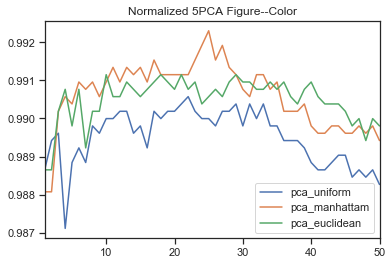

In [15]:
pca = PCA(n_components = 5)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

#uniform
n_neighborslist = list(range(1,51))
col_names=['uniform']
accarray = np.zeros((len(n_neighborslist),1))
acc5_pca=pd.DataFrame(accarray, columns=col_names)
for k in n_neighborslist:
    neigh = neighbors.KNeighborsClassifier(n_neighbors=k, weights=col_names[0])
    neigh.fit(X_train_pca, y_train)
    y_pred = neigh.predict(X_test_pca)
    accscore = accuracy_score(y_test, y_pred)
    acc5_pca.at[k,'pca_uniform'] = accscore
    
#manhattam
n_neighborslist = list(range(1,51))
accarray = np.zeros((len(n_neighborslist),1))
acc5_pca_man=pd.DataFrame(accarray, columns=['pca_manhattam'])
for k in n_neighborslist:
    neigh = neighbors.KNeighborsClassifier(n_neighbors=k, weights='distance', p=1)
    neigh.fit(X_train_pca, y_train)
    y_pred = neigh.predict(X_test_pca)
    accscore = accuracy_score(y_test, y_pred)
    acc5_pca_man.at[k,'pca_manhattam'] = accscore

#euclidean
n_neighborslist = list(range(1,51))
accarray = np.zeros((len(n_neighborslist),1))
acc5_pca_euc=pd.DataFrame(accarray, columns=['pca_euclidean'])
for k in n_neighborslist:
    neigh = neighbors.KNeighborsClassifier(n_neighbors=k, weights='distance', p=2)
    neigh.fit(X_train_pca, y_train)
    y_pred = neigh.predict(X_test_pca)
    accscore = accuracy_score(y_test, y_pred)
    acc5_pca_euc.at[k,'pca_euclidean'] = accscore

ax = plt.gca()
ax.set_title('Normalized 5PCA Figure--Color')

acc_pca[1:].plot(ax = ax, kind='line',  y = 'pca_uniform')
acc_pca_man[1:].plot(ax = ax, kind='line',  y = 'pca_manhattam')
acc_pca_euc[1:].plot(ax = ax, kind='line', y = 'pca_euclidean')

plt.show()

In [ ]:
wine_normalized_quality = pd.concat([wine_normalized1, wine[DLC]['quality']], axis = 1)
# classify quality of wine with all features
X1 = wine_normalized_quality[D].values
y1 = np.ravel(wine_normalized_quality[[L]])
# train/test split
ran = 42
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.8, random_state = ran) 
pca = PCA()
X1_train_pca = pca.fit_transform(X1_train)
X1_test_pca = pca.transform(X1_test)

#uniform
n_neighborslist = list(range(1,51))
col_names=['uniform']
accarray = np.zeros((len(n_neighborslist),1))
acc_pca1=pd.DataFrame(accarray, columns=col_names)
for k in n_neighborslist:
    neigh = neighbors.KNeighborsClassifier(n_neighbors=k, weights=col_names[0])
    neigh.fit(X1_train_pca, y1_train)
    y1_pred = neigh.predict(X1_test_pca)
    accscore = accuracy_score(y1_test, y1_pred)
    acc_pca1.at[k,'pca_uniform'] = accscore

#manhattam
n_neighborslist = list(range(1,51))
accarray = np.zeros((len(n_neighborslist),1))
acc_pca_man1=pd.DataFrame(accarray, columns=['pca_manhattam'])
for k in n_neighborslist:
    neigh = neighbors.KNeighborsClassifier(n_neighbors=k, weights='distance', p=1)
    neigh.fit(X1_train_pca, y1_train)
    y1_pred = neigh.predict(X1_test_pca)
    accscore = accuracy_score(y1_test, y1_pred)
    acc_pca_man1.at[k,'pca_manhattam'] = accscore

#euclidean
n_neighborslist = list(range(1,51))
accarray = np.zeros((len(n_neighborslist),1))
acc_pca_euc1=pd.DataFrame(accarray, columns=['pca_euclidean'])
for k in n_neighborslist:
    neigh = neighbors.KNeighborsClassifier(n_neighbors=k, weights='distance', p=2)
    neigh.fit(X1_train_pca, y1_train)
    y1_pred = neigh.predict(X1_test_pca)
    accscore = accuracy_score(y1_test, y1_pred)
    acc_pca_euc1.at[k,'pca_euclidean'] = accscore

ax = plt.gca()
ax.set_title('Normalized PCA Figure--Quality')

acc_pca1[1:].plot(ax = ax, kind='line',  y = 'pca_uniform')
acc_pca_man1[1:].plot(ax = ax, kind='line',  y = 'pca_manhattam')
acc_pca_euc1[1:].plot(ax = ax, kind='line', y = 'pca_euclidean')

plt.show()

In [ ]:
lda = LinearDiscriminantAnalysis()
X1_train_lda = lda.fit_transform(X1_train, y1_train)
X1_test_lda = lda.transform(X1_test)

#uniform
n_neighborslist = list(range(1,51))
col_names=['uniform']
accarray = np.zeros((len(n_neighborslist),1))
acc_lda1=pd.DataFrame(accarray, columns=['lda_uniform'])
for k in n_neighborslist:
    neigh = neighbors.KNeighborsClassifier(n_neighbors=k, weights=col_names[0])
    neigh.fit(X1_train_lda, y1_train)
    y1_pred = neigh.predict(X1_test_lda)
    accscore = accuracy_score(y1_test, y1_pred)
    acc_lda1.at[k,'lda_uniform'] = accscore
    
#manhattam
n_neighborslist = list(range(1,51))
col_names=['distance']
accarray = np.zeros((len(n_neighborslist),1))
acc_lda_man1=pd.DataFrame(accarray, columns=['lda_manhattam'])
for k in n_neighborslist:
    neigh = neighbors.KNeighborsClassifier(n_neighbors=k, weights=col_names[0], p = 1)
    neigh.fit(X1_train_lda, y1_train)
    y1_pred = neigh.predict(X1_test_lda)
    accscore = accuracy_score(y1_test, y1_pred)
    acc_lda_man1.at[k,'lda_manhattam'] = accscore

#euclidean
n_neighborslist = list(range(1,51))
col_names=['distance']
accarray = np.zeros((len(n_neighborslist),1))
acc_lda_euc1=pd.DataFrame(accarray, columns=['lda_euclidean'])
for k in n_neighborslist:
    neigh = neighbors.KNeighborsClassifier(n_neighbors=k, weights=col_names[0], p = 2)
    neigh.fit(X1_train_lda, y1_train)
    y1_pred = neigh.predict(X1_test_lda)
    accscore = accuracy_score(y1_test, y1_pred)
    acc_lda_euc1.at[k,'lda_euclidean'] = accscore

ax = plt.gca()
ax.set_title('Normalized LDA Figure--Quality')

acc_lda1[1:].plot(ax = ax, kind='line',  y = 'lda_uniform')
acc_lda_man1[1:].plot(ax = ax, kind='line',  y = 'lda_manhattam')
acc_lda_euc1[1:].plot(ax = ax, kind='line', y = 'lda_euclidean')

plt.show()

In [ ]:
pca = PCA(n_components = 5)
X1_train_pca = pca.fit_transform(X1_train)
X1_test_pca = pca.transform(X1_test)
#uniform
n_neighborslist = list(range(1,51))
col_names=['uniform']
accarray = np.zeros((len(n_neighborslist),1))
acc5_pca1=pd.DataFrame(accarray, columns=col_names)
for k in n_neighborslist:
    neigh = neighbors.KNeighborsClassifier(n_neighbors=k, weights=col_names[0])
    neigh.fit(X1_train_pca, y1_train)
    y1_pred = neigh.predict(X1_test_pca)
    accscore = accuracy_score(y1_test, y1_pred)
    acc5_pca1.at[k,'pca_uniform'] = accscore
    
#manhattam
n_neighborslist = list(range(1,51))
accarray = np.zeros((len(n_neighborslist),1))
acc5_pca_man1=pd.DataFrame(accarray, columns=['pca_manhattam'])
for k in n_neighborslist:
    neigh = neighbors.KNeighborsClassifier(n_neighbors=k, weights='distance', p=1)
    neigh.fit(X1_train_pca, y1_train)
    y1_pred = neigh.predict(X1_test_pca)
    accscore = accuracy_score(y1_test, y1_pred)
    acc5_pca_man1.at[k,'pca_manhattam'] = accscore
    
#euclidean
n_neighborslist = list(range(1,51))
accarray = np.zeros((len(n_neighborslist),1))
acc5_pca_euc1=pd.DataFrame(accarray, columns=['pca_euclidean'])
for k in n_neighborslist:
    neigh = neighbors.KNeighborsClassifier(n_neighbors=k, weights='distance', p=2)
    neigh.fit(X1_train_pca, y1_train)
    y1_pred = neigh.predict(X1_test_pca)
    accscore = accuracy_score(y1_test, y1_pred)
    acc5_pca_euc1.at[k,'pca_euclidean'] = accscore
    
ax = plt.gca()
ax.set_title('Normalized 5PCA Figure--Quality')

acc5_pca1[1:].plot(ax = ax, kind='line',  y = 'pca_uniform')
acc5_pca_man1[1:].plot(ax = ax, kind='line',  y = 'pca_manhattam')
acc5_pca_euc1[1:].plot(ax = ax, kind='line', y = 'pca_euclidean')

plt.show()

In [ ]:
# classify color of wine with all features
Xn = wine[D].values
yn = np.ravel(wine[C])
# train/test split
ran = 42
Xn_train, Xn_test, yn_train, yn_test = train_test_split(Xn, yn, test_size=0.8, random_state = ran) 
#uniform
n_neighborslist = list(range(1,51))
col_names=['uniform']
accarray = np.zeros((len(n_neighborslist),1))
accn=pd.DataFrame(accarray, columns=col_names)
for k in n_neighborslist:
    neigh = neighbors.KNeighborsClassifier(n_neighbors=k, weights=col_names[0])
    neigh.fit(Xn_train, yn_train)
    y_pred = neigh.predict(Xn_test)
    accscore = accuracy_score(yn_test, y_pred)
    accn.at[k,col_names[0]] = accscore
    
#manhattam
n_neighborslist = list(range(1,51))
col_names=['distance']
accarray = np.zeros((len(n_neighborslist),1))
accn_man=pd.DataFrame(accarray, columns=['manhattam'])
for k in n_neighborslist:
    neigh = neighbors.KNeighborsClassifier(n_neighbors=k, weights=col_names[0], p=1)
    neigh.fit(Xn_train, yn_train)
    y_pred = neigh.predict(Xn_test)
    accscore = accuracy_score(yn_test, y_pred)
    accn_man.at[k,'manhattam'] = accscore
    
#euclidean
n_neighborslist = list(range(1,51))
col_names=['distance']
accarray = np.zeros((len(n_neighborslist),1))
accn_eu =pd.DataFrame(accarray, columns=['euclidean'])
for k in n_neighborslist:
    neigh = neighbors.KNeighborsClassifier(n_neighbors=k, weights=col_names[0], p=2)
    neigh.fit(Xn_train, yn_train)
    y_pred = neigh.predict(Xn_test)
    accscore = accuracy_score(yn_test, y_pred)
    accn_eu.at[k,'euclidean'] = accscore
    
ax = plt.gca()
ax.set_title('Non-normalized Figure--Color')

accn[1:].plot(ax = ax, kind='line',  y = 'uniform')
accn_man[1:].plot(ax = ax, kind='line',  y = 'manhattam')
accn_eu[1:].plot(ax = ax, kind='line', y = 'euclidean')

plt.show()

In [ ]:
pca = PCA()
Xn_train_pca = pca.fit_transform(Xn_train)
Xn_test_pca = pca.transform(Xn_test)
#uniform
n_neighborslist = list(range(1,51))
col_names=['uniform']
accarray = np.zeros((len(n_neighborslist),1))
accn_pca=pd.DataFrame(accarray, columns=col_names)
for k in n_neighborslist:
    neigh = neighbors.KNeighborsClassifier(n_neighbors=k, weights=col_names[0])
    neigh.fit(Xn_train_pca, yn_train)
    y_pred = neigh.predict(Xn_test_pca)
    accscore = accuracy_score(yn_test, y_pred)
    accn_pca.at[k,'pca_uniform'] = accscore
    
#manhattam
n_neighborslist = list(range(1,51))
accarray = np.zeros((len(n_neighborslist),1))
accn_pca_man=pd.DataFrame(accarray, columns=['pca_manhattam'])
for k in n_neighborslist:
    neigh = neighbors.KNeighborsClassifier(n_neighbors=k, weights='distance', p=1)
    neigh.fit(Xn_train_pca, yn_train)
    y_pred = neigh.predict(Xn_test_pca)
    accscore = accuracy_score(yn_test, y_pred)
    accn_pca_man.at[k,'pca_manhattam'] = accscore
    
#euclidean
n_neighborslist = list(range(1,51))
accarray = np.zeros((len(n_neighborslist),1))
accn_pca_euc=pd.DataFrame(accarray, columns=['pca_euclidean'])
for k in n_neighborslist:
    neigh = neighbors.KNeighborsClassifier(n_neighbors=k, weights='distance', p=2)
    neigh.fit(Xn_train_pca, yn_train)
    y_pred = neigh.predict(Xn_test_pca)
    accscore = accuracy_score(yn_test, y_pred)
    accn_pca_euc.at[k,'pca_euclidean'] = accscore
    
ax = plt.gca()
ax.set_title('Non-normalized PCA Figure--Color')
accn_pca[1:].plot(ax = ax, kind='line',  y = 'pca_uniform')
accn_pca_man[1:].plot(ax = ax, kind='line',  y = 'pca_manhattam')
accn_pca_euc[1:].plot(ax = ax, kind='line', y = 'pca_euclidean')

plt.show()

In [ ]:
pca = PCA(n_components=5)
Xn5_train_pca = pca.fit_transform(Xn_train)
Xn5_test_pca = pca.transform(Xn_test)
#uniform
pca = PCA(n_components=5)
n_neighborslist = list(range(1,51))
col_names=['uniform']
accarray = np.zeros((len(n_neighborslist),1))
accn5_pca=pd.DataFrame(accarray, columns=col_names)
for k in n_neighborslist:
    neigh = neighbors.KNeighborsClassifier(n_neighbors=k, weights=col_names[0])
    neigh.fit(Xn5_train_pca, yn_train)
    y_pred = neigh.predict(Xn5_test_pca)
    accscore = accuracy_score(yn_test, y_pred)
    accn5_pca.at[k,'pca_uniform'] = accscore
    
#manhattam
pca = PCA(n_components=5)
n_neighborslist = list(range(1,51))
accarray = np.zeros((len(n_neighborslist),1))
accn5_pca_man=pd.DataFrame(accarray, columns=['pca_manhattam'])
for k in n_neighborslist:
    neigh = neighbors.KNeighborsClassifier(n_neighbors=k, weights='distance', p=1)
    neigh.fit(Xn5_train_pca, yn_train)
    y_pred = neigh.predict(Xn5_test_pca)
    accscore = accuracy_score(yn_test, y_pred)
    accn5_pca_man.at[k,'pca_manhattam'] = accscore
    
#euclidean
pca = PCA(n_components=5)
n_neighborslist = list(range(1,51))
accarray = np.zeros((len(n_neighborslist),1))
accn5_pca_euc=pd.DataFrame(accarray, columns=['pca_euclidean'])
for k in n_neighborslist:
    neigh = neighbors.KNeighborsClassifier(n_neighbors=k, weights='distance', p=2)
    neigh.fit(Xn5_train_pca, yn_train)
    y_pred = neigh.predict(Xn5_test_pca)
    accscore = accuracy_score(yn_test, y_pred)
    accn5_pca_euc.at[k,'pca_euclidean'] = accscore
    
ax = plt.gca()
ax.set_title('Non-normalized 5PCA Figure--Color')
accn5_pca[1:].plot(ax = ax, kind='line',  y = 'pca_uniform')
accn5_pca_man[1:].plot(ax = ax, kind='line',  y = 'pca_manhattam')
accn5_pca_euc[1:].plot(ax = ax, kind='line', y = 'pca_euclidean')

plt.show()

In [ ]:
# classify quality of wine with all features
Xn1 = wine[D].values
yn1 = np.ravel(wine[L])
# train/test split
ran = 42
Xn1_train, Xn1_test, yn1_train, yn1_test = train_test_split(Xn1, yn1, test_size=0.8, random_state = ran) 
pca = PCA()
Xn1_train_pca = pca.fit_transform(Xn1_train)
Xn1_test_pca = pca.transform(Xn1_test)
#uniform
n_neighborslist = list(range(1,51))
col_names=['uniform']
accarray = np.zeros((len(n_neighborslist),1))
accn_pca1=pd.DataFrame(accarray, columns=col_names)
for k in n_neighborslist:
    neigh = neighbors.KNeighborsClassifier(n_neighbors=k, weights=col_names[0])
    neigh.fit(Xn1_train_pca, yn1_train)
    y1_pred = neigh.predict(Xn1_test_pca)
    accscore = accuracy_score(yn1_test, y1_pred)
    accn_pca1.at[k,'pca_uniform'] = accscore
    
#manhattam
n_neighborslist = list(range(1,51))
accarray = np.zeros((len(n_neighborslist),1))
accn_pca_man1=pd.DataFrame(accarray, columns=['pca_manhattam'])
for k in n_neighborslist:
    neigh = neighbors.KNeighborsClassifier(n_neighbors=k, weights='distance', p=1)
    neigh.fit(Xn1_train_pca, yn1_train)
    y1_pred = neigh.predict(Xn1_test_pca)
    accscore = accuracy_score(yn1_test, y1_pred)
    accn_pca_man1.at[k,'pca_manhattam'] = accscore
    
#euclidean
n_neighborslist = list(range(1,51))
accarray = np.zeros((len(n_neighborslist),1))
accn_pca_euc1=pd.DataFrame(accarray, columns=['pca_euclidean'])
for k in n_neighborslist:
    neigh = neighbors.KNeighborsClassifier(n_neighbors=k, weights='distance', p=2)
    neigh.fit(Xn1_train_pca, yn1_train)
    y1_pred = neigh.predict(Xn1_test_pca)
    accscore = accuracy_score(yn1_test, y1_pred)
    accn_pca_euc1.at[k,'pca_euclidean'] = accscore
    
ax = plt.gca()
ax.set_title('Non-normalized PCA Figure--Quality')

accn_pca1[1:].plot(ax = ax, kind='line',  y = 'pca_uniform')
accn_pca_man1[1:].plot(ax = ax, kind='line',  y = 'pca_manhattam')
accn_pca_euc1[1:].plot(ax = ax, kind='line', y = 'pca_euclidean')

plt.show()

In [ ]:
pca = PCA(n_components = 5)
Xn15_train_pca = pca.fit_transform(Xn1_train)
Xn15_test_pca = pca.transform(Xn1_test)
#uniform
n_neighborslist = list(range(1,51))
col_names=['uniform']
accarray = np.zeros((len(n_neighborslist),1))
accn5_pca1=pd.DataFrame(accarray, columns=col_names)
for k in n_neighborslist:
    neigh = neighbors.KNeighborsClassifier(n_neighbors=k, weights=col_names[0])
    neigh.fit(Xn15_train_pca, yn1_train)
    y1_pred = neigh.predict(Xn15_test_pca)
    accscore = accuracy_score(yn1_test, y1_pred)
    accn5_pca1.at[k,'pca_uniform'] = accscore
    
#manhattam
n_neighborslist = list(range(1,51))
accarray = np.zeros((len(n_neighborslist),1))
accn5_pca_man1=pd.DataFrame(accarray, columns=['pca_manhattam'])
for k in n_neighborslist:
    neigh = neighbors.KNeighborsClassifier(n_neighbors=k, weights='distance', p=1)
    neigh.fit(Xn15_train_pca, yn1_train)
    y1_pred = neigh.predict(Xn15_test_pca)
    accscore = accuracy_score(yn1_test, y1_pred)
    accn5_pca_man1.at[k,'pca_manhattam'] = accscore
    
#euclidean
n_neighborslist = list(range(1,51))
accarray = np.zeros((len(n_neighborslist),1))
accn5_pca_euc1=pd.DataFrame(accarray, columns=['pca_euclidean'])
for k in n_neighborslist:
    neigh = neighbors.KNeighborsClassifier(n_neighbors=k, weights='distance', p=2)
    neigh.fit(Xn15_train_pca, yn1_train)
    y1_pred = neigh.predict(Xn15_test_pca)
    accscore = accuracy_score(yn1_test, y1_pred)
    accn5_pca_euc1.at[k,'pca_euclidean'] = accscore
    
ax = plt.gca()
ax.set_title('Non-normalized 5PCA Figure--Quality')

accn_pca1[1:].plot(ax = ax, kind='line',  y = 'pca_uniform')
accn_pca_man1[1:].plot(ax = ax, kind='line',  y = 'pca_manhattam')
accn_pca_euc1[1:].plot(ax = ax, kind='line', y = 'pca_euclidean')

plt.show()

In [ ]:
Xn1_train_lda = lda.fit_transform(Xn1_train, yn1_train)
Xn1_test_lda = lda.transform(Xn1_test)
#uniform
n_neighborslist = list(range(1,51))
col_names=['uniform']
accarray = np.zeros((len(n_neighborslist),1))
accn_lda1=pd.DataFrame(accarray, columns=['lda_uniform'])
for k in n_neighborslist:
    neigh = neighbors.KNeighborsClassifier(n_neighbors=k, weights=col_names[0])
    neigh.fit(Xn1_train_lda, yn1_train)
    y1_pred = neigh.predict(Xn1_test_lda)
    accscore = accuracy_score(yn1_test, y1_pred)
    accn_lda1.at[k,'lda_uniform'] = accscore
    
#manhattam
n_neighborslist = list(range(1,51))
col_names=['distance']
accarray = np.zeros((len(n_neighborslist),1))
accn_lda_man1=pd.DataFrame(accarray, columns=['lda_manhattam'])
for k in n_neighborslist:
    neigh = neighbors.KNeighborsClassifier(n_neighbors=k, weights=col_names[0], p = 1)
    neigh.fit(Xn1_train_lda, yn1_train)
    y1_pred = neigh.predict(Xn1_test_lda)
    accscore = accuracy_score(yn1_test, y1_pred)
    accn_lda_man1.at[k,'lda_manhattam'] = accscore
    
#euclidean
n_neighborslist = list(range(1,51))
col_names=['distance']
accarray = np.zeros((len(n_neighborslist),1))
accn_lda_euc1=pd.DataFrame(accarray, columns=['lda_euclidean'])
for k in n_neighborslist:
    neigh = neighbors.KNeighborsClassifier(n_neighbors=k, weights=col_names[0], p = 2)
    neigh.fit(Xn1_train_lda, yn1_train)
    y1_pred = neigh.predict(Xn1_test_lda)
    accscore = accuracy_score(yn1_test, y1_pred)
    accn_lda_euc1.at[k,'lda_euclidean'] = accscore
    
ax = plt.gca()
ax.set_title('Non-normalized LDA Figure--Quality')

acc_lda1[1:].plot(ax = ax, kind='line',  y = 'lda_uniform')
acc_lda_man1[1:].plot(ax = ax, kind='line',  y = 'lda_manhattam')
acc_lda_euc1[1:].plot(ax = ax, kind='line', y = 'lda_euclidean')

plt.show()

As the graph above, we can simply tell that lda is better than pca model on non-normalized dataset which label is quality. Lda_manhattam and lda_euclidean have almost the same value. And uniform scheme is almost the worst both in LDA and PCA models in this situation.
No matter normalized or non-normalized data, we can find using PCA and LDA model are better than no model based on the observation.

### 1.1.5 Analysis and Discussion

-K plot: Has already ploted aboved.  

-Features: We have ploted figures with two forms of data, normalized and non-normalized. Normalized data makes data more clearly, normalized. This uaually has a good results than non-normalized data. If we choose different labels to classification, such as color and quality, there will affect the plot line figures as well. Also, we do the same PCA in normalized and color label data, but when we change n_components in PCA, we also can get different results. This means n_components will affect the results as well.  

-Selected Features: I have ploted 2 graphs above, and put PCA and LDA together if they have he same restrictions on data. As the graphs aboved, the manhattam has a better result than uniform and euclidean schemes. Normalized data has better results on non-normalized data. In general, lDA has a better result in this dataset than PCA( not exactly better, but the overview trend). Using PCA and LDA model can have better results than those without any models.  

-PCA vs LDA: As the results above, PCA and LDA do help in this situation. And LDA seems better than PCA in this situation( overview better, not exactly better). And normalization of data impact better on PCA model and no model situations. On LDA model, normalization and non-normalization have the same results. Normalization really do help.  

-Plot: The two pairplots above give the every feature in wine dataset. And we can easily see how every feature's will go in pairplots. The meaning of each feature dimension of the principal component has a certain ambiguity, which is not as explanatory as the features of the original sample like in the data ploting the pairplots.Some non-principal components may also contain important information about sample differences. So when we discarde them, we may have an impact on subsequent data processing due to dimensionality reduction. We may loss some information. While in color label, we cannot use LDA model. So LDA model has its own restriction.  

<Figure size 432x288 with 0 Axes>

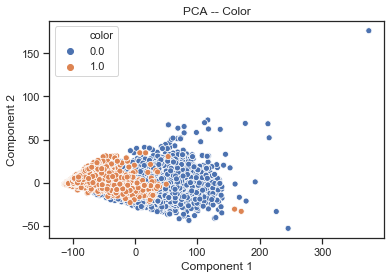

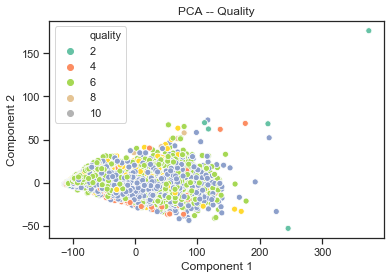

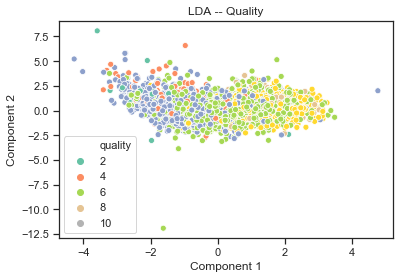

<Figure size 432x288 with 0 Axes>

In [16]:
pca = PCA(n_components = 2)
Datawine = pca.fit_transform(wine[D])
pca_color = sns.scatterplot(x = Datawine[:,0], y = Datawine[:,1], hue = wine[C])
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('PCA -- Color')
plt.figure()

pca = PCA(n_components = 2)
Datawine = pca.fit_transform(wine[D])
pca_quality = sns.scatterplot(x = Datawine[:,0], y = Datawine[:,1], hue = wine[L],palette="Set2")
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('PCA -- Quality')
plt.figure()

lda = LinearDiscriminantAnalysis(n_components = 2)
Datawinelda = lda.fit_transform(wine[D], wine[L])
lda_quality = sns.scatterplot(x = Datawinelda[:,0], y= Datawinelda[:,1], hue = wine[L], palette="Set2")
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('LDA -- Quality')
plt.figure()